In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

## Задача № 1
Постройте график \
Назовите график \
Сделайте именование оси x и оси y \
Сделайте выводы

### Задача № 1.1
Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices \
\
*Видимо, данная ссылка ошибочная, т.к. она про компьютеры, а не про дома. Поэтому я буду использовать набор данных про недвижимость из предыдущего семинара.*\

In [3]:
df = pd.read_csv("kc_house_data.csv", parse_dates=["date"])

### Задача № 1.2 
Изучите стоимости недвижимости

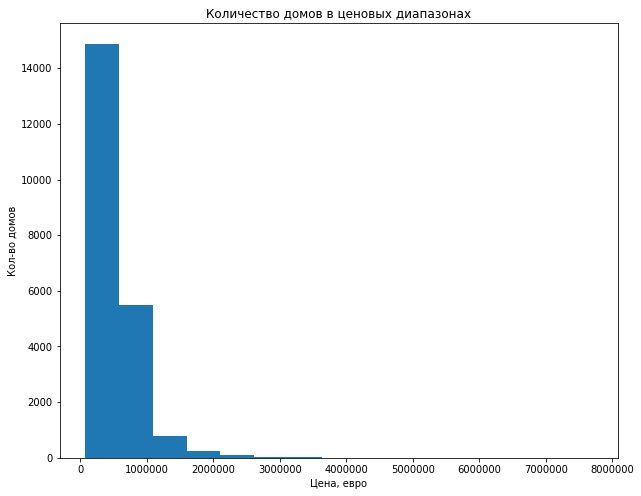

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(df['price'], bins=15)
ax.set_title('Количество домов в ценовых диапазонах')
ax.set_xlabel('Цена, евро')
ax.set_ylabel('Кол-во домов')
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'));

In [5]:
df_price_by_bedrooms = df.groupby('bedrooms').agg({'price':'mean'}).round(2).sort_values('price').reset_index().rename({'bedrooms': 'Кол-во спален', 'price': 'Средняя цена'}, axis = 'columns')
df_price_by_bedrooms

,Кол-во спален,Средняя цена
0,1,317642.88
1,2,401372.68
2,0,409503.85
3,3,466232.08
4,11,520000.00
5,4,635419.50
6,33,640000.00
7,5,786599.83
8,10,819333.33
9,6,825520.64


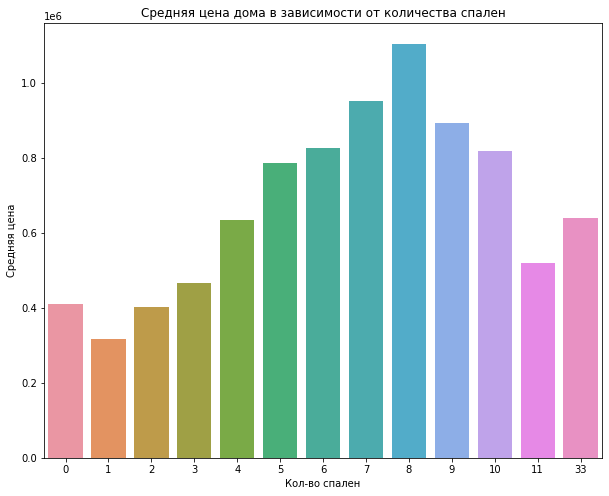

In [6]:

plt.figure(figsize=(10, 8))
sns.barplot(x = df_price_by_bedrooms['Кол-во спален'], y = df_price_by_bedrooms['Средняя цена'])
plt.title('Средняя цена дома в зависимости от количества спален')
plt.xlabel('Кол-во спален')
plt.ylabel('Средняя цена');

#### Выводы: 
1. Больше всего домов в нижнем ценовом сегменте стоимостью до 1 млн. евро.
2. При этом это достаточно высокий спрос на дома с 7 - 8 спальнями, т.к. они стоят дороже всего. Даже дороже домов с большим количеством спален.
3. Следовательно, количество спален не является главным фактором ценообразования на дома.

### Задача № 1.3 
Изучите распределение квадратуры жилой площади

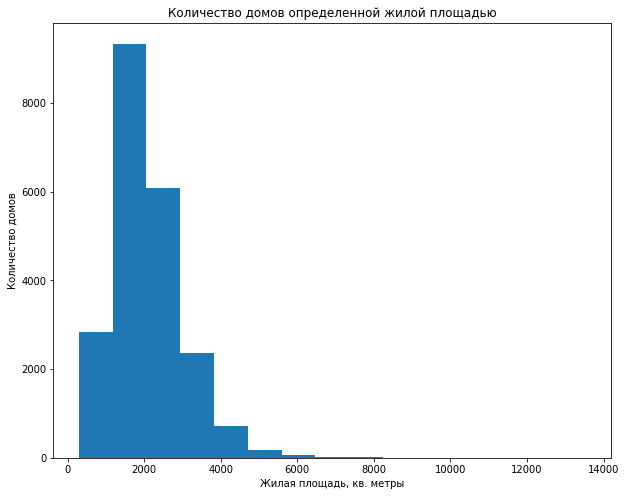

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(df['sqft_living'], bins=15)
ax.set_title('Количество домов определенной жилой площадью')
ax.set_xlabel('Жилая площадь, кв. метры')
ax.set_ylabel('Количество домов')
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'));

#### Вывод: Большинство домов с жилой площадью от 1000 до 2000 кв. метров.

### Задача № 1.4
Изучите распределение года постройки

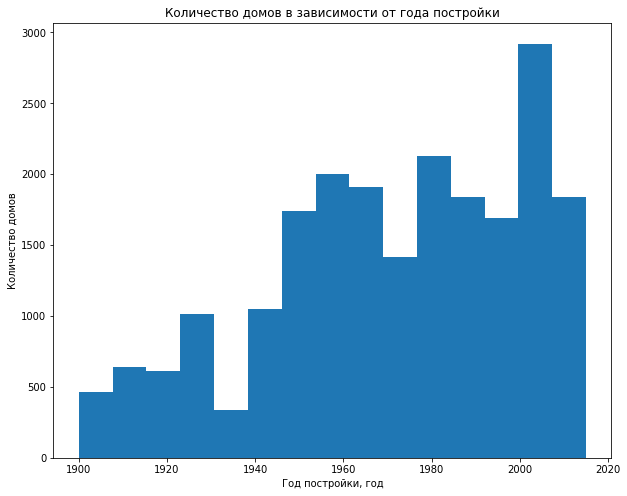

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(df['yr_built'], bins=15)
ax.set_title('Количество домов в зависимости от года постройки')
ax.set_xlabel('Год постройки, год')
ax.set_ylabel('Количество домов')
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'));

#### Выводы:
1. Большинство домов относительно новые - после 2000 года постройки.
2. Снижение уровня строительства домов наблюдалась перед 1940-ым годом (заключительный этап великой депрессии), в конце 70-х (экономический кризис перед периодом президенства Рейгана) и около 2000 года (мировой кризис доткомов).
3. Количество строящихся домов является хорошим маркером экономической ситуации в США.

## Задача № 2

### Задача № 2.1 
Изучите распределение домов от наличия вида на набережную. \
Постройте график. \
Сделайте выводы.

In [42]:
df_view_features = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'waterfront']]
df_view_features = df_view_features.rename({'price': 'Цена дома', 'bedrooms':'Кол-во спален', 'bathrooms':'Кол-во ванных', 'sqft_living':'Жилые кв. метры', 'sqft_lot':'Общие кв. метры', 'sqft_above':'Кв. метры выше земли', 'sqft_basement':'Кв. выше земли', 'waterfront':'Вид на море'}, axis='columns')
df_view_features.loc[df_view_features['Вид на море'] == 0,'Вид на море'] = 'Нет'
df_view_features.loc[df_view_features['Вид на море'] == 1, 'Вид на море'] = 'Есть'

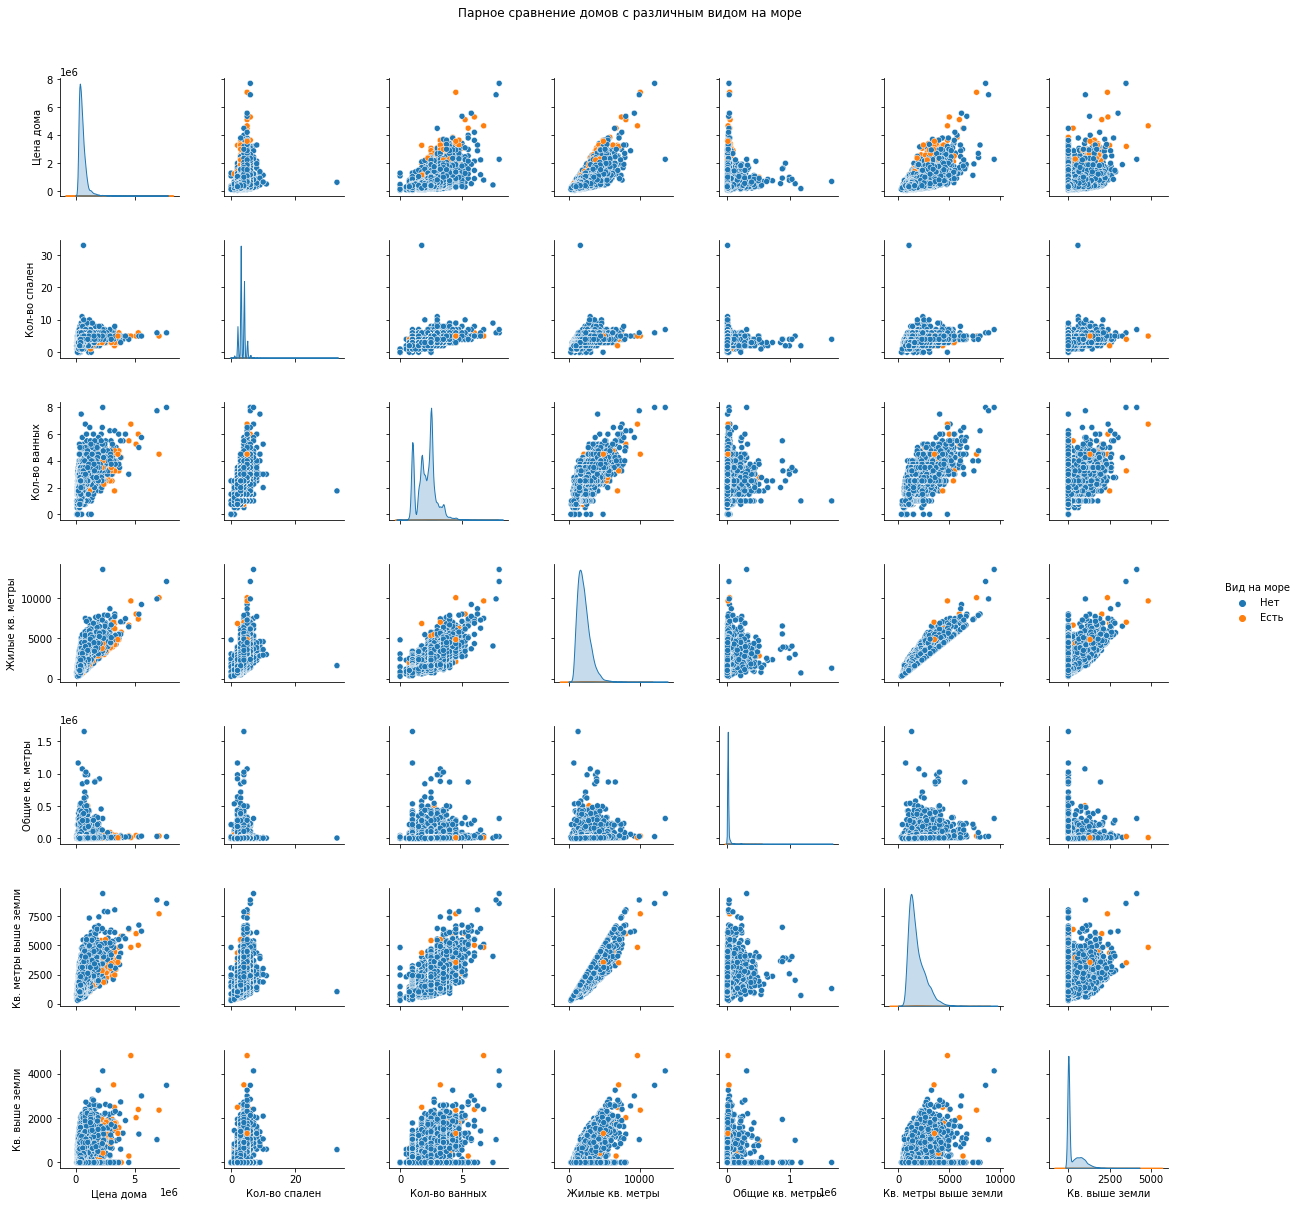

In [47]:
figure = sns.pairplot(df_view_features, hue='Вид на море')
figure.fig.suptitle('Парное сравнение домов с различным видом на море')
figure.tight_layout(pad = 3.0);


#### Выводы:
1. Домов с видом на набережную немного относительно всех видов недвижимости.
2. Все дома с видом на набережную чаще всего находятся в основном в верхних правых частях графиков, что свидетельствует о том, этот параметр увеличивает цену и другие показатели оценки домов. 

### Задача № 2.2 
Изучите распределение этажей домов.

In [11]:
df_floors = pd.DataFrame(df['floors'].value_counts()).reset_index().rename({'index': 'Кол-во этажей', 'floors': 'Кол-во домов'}, axis = 'columns')

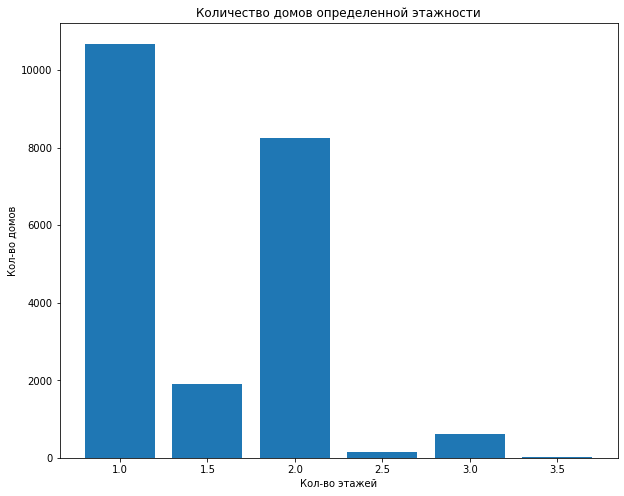

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(x = df_floors['Кол-во этажей'], height = df_floors['Кол-во домов'], width=0.4)
ax.set_title('Количество домов определенной этажности')
ax.set_xlabel('Кол-во этажей')
ax.set_ylabel('Кол-во домов');

#### Вывод: большинство домов одно и двухэтажные. 

### Задача № 2.3
Изучите распределение состояния домов

In [19]:
df_condition = pd.DataFrame(df['condition'].value_counts()).reset_index().rename({'index': 'Состояние домов', 'condition': 'Кол-во домов'}, axis = 'columns')

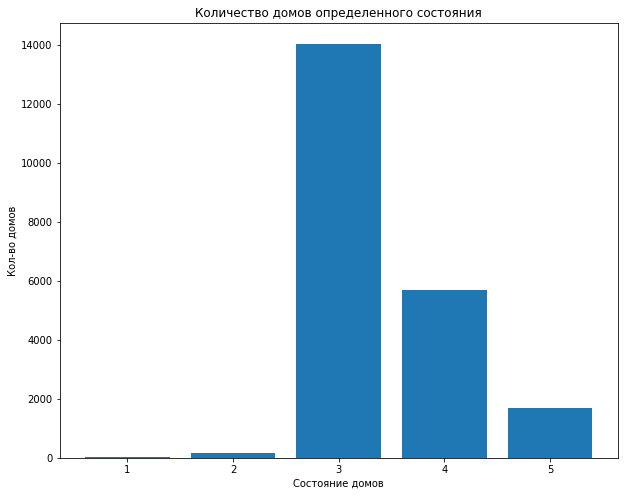

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(x = df_condition['Состояние домов'], height = df_condition['Кол-во домов'])
ax.set_title('Количество домов определенного состояния')
ax.set_xlabel('Состояние домов')
ax.set_ylabel('Кол-во домов');

#### Вывод: большинство домов в состоянии среднего качества.

## Задача № 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. \
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [15]:
df_num_features = df.select_dtypes(include=['int64', 'float64', 'float32', 'float16'])
df_num_features = df_num_features[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']]
df_nominal_features = df[['price', 'floors', 'waterfront', 'view', 'condition', 'grade']]

Text(0.5, 1.0, 'Цена дома взависимости от года постройки')

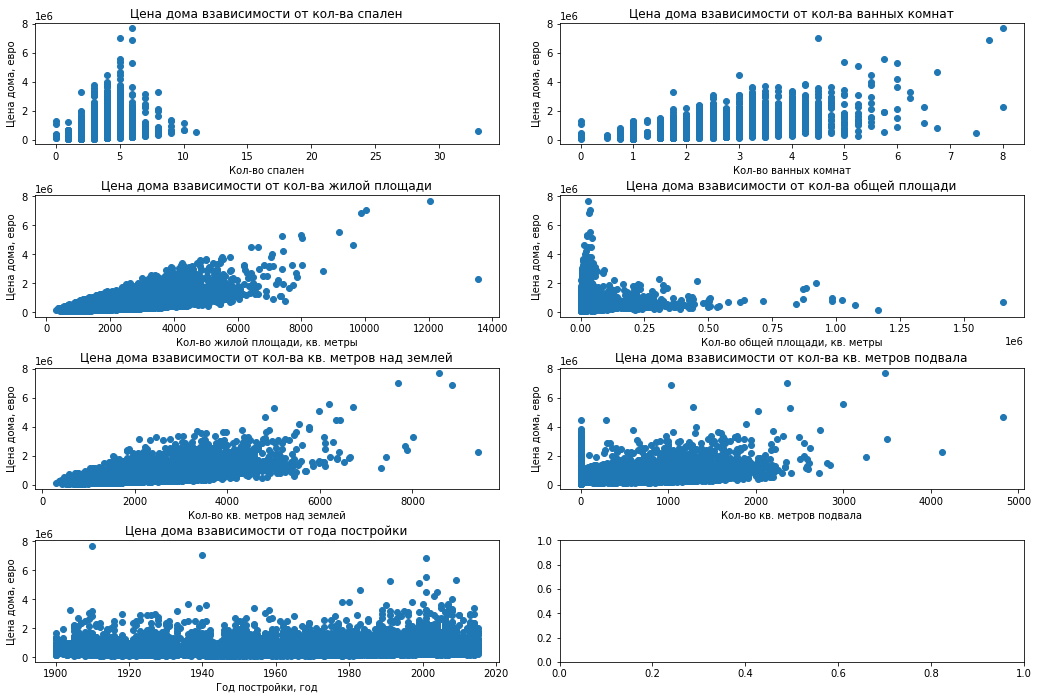

In [16]:
fig, axs = plt.subplots(4, 2, figsize=(15, 10))
fig.tight_layout(pad = 3.0)

axs[0, 0].scatter(x = df_num_features['bedrooms'], y = df_num_features['price'])
axs[0, 0].set_xlabel('Кол-во спален')
axs[0, 0].set_ylabel('Цена дома, евро')
axs[0, 0].set_title("Цена дома взависимости от кол-ва спален")

axs[0, 1].scatter(x = df_num_features['bathrooms'], y = df_num_features['price'])
axs[0, 1].set_xlabel('Кол-во ванных комнат')
axs[0, 1].set_ylabel('Цена дома, евро')
axs[0, 1].set_title("Цена дома взависимости от кол-ва ванных комнат")

axs[1, 0].scatter(x = df_num_features['sqft_living'], y = df_num_features['price'])
axs[1, 0].set_xlabel('Кол-во жилой площади, кв. метры')
axs[1, 0].set_ylabel('Цена дома, евро')
axs[1, 0].set_title("Цена дома взависимости от кол-ва жилой площади")

axs[1, 1].scatter(x = df_num_features['sqft_lot'], y = df_num_features['price'])
axs[1, 1].set_xlabel('Кол-во общей площади, кв. метры')
axs[1, 1].set_ylabel('Цена дома, евро')
axs[1, 1].set_title("Цена дома взависимости от кол-ва общей площади")

axs[2, 0].scatter(x = df_num_features['sqft_above'], y = df_num_features['price'])
axs[2, 0].set_xlabel('Кол-во кв. метров над землей')
axs[2, 0].set_ylabel('Цена дома, евро')
axs[2, 0].set_title("Цена дома взависимости от кол-ва кв. метров над землей")

axs[2, 1].scatter(x = df_num_features['sqft_basement'], y = df_num_features['price'])
axs[2, 1].set_xlabel('Кол-во кв. метров подвала')
axs[2, 1].set_ylabel('Цена дома, евро')
axs[2, 1].set_title("Цена дома взависимости от кол-ва кв. метров подвала")

axs[3, 0].scatter(x = df_num_features['yr_built'], y = df_num_features['price'])
axs[3, 0].set_xlabel('Год постройки, год')
axs[3, 0].set_ylabel('Цена дома, евро')
axs[3, 0].set_title("Цена дома взависимости от года постройки")

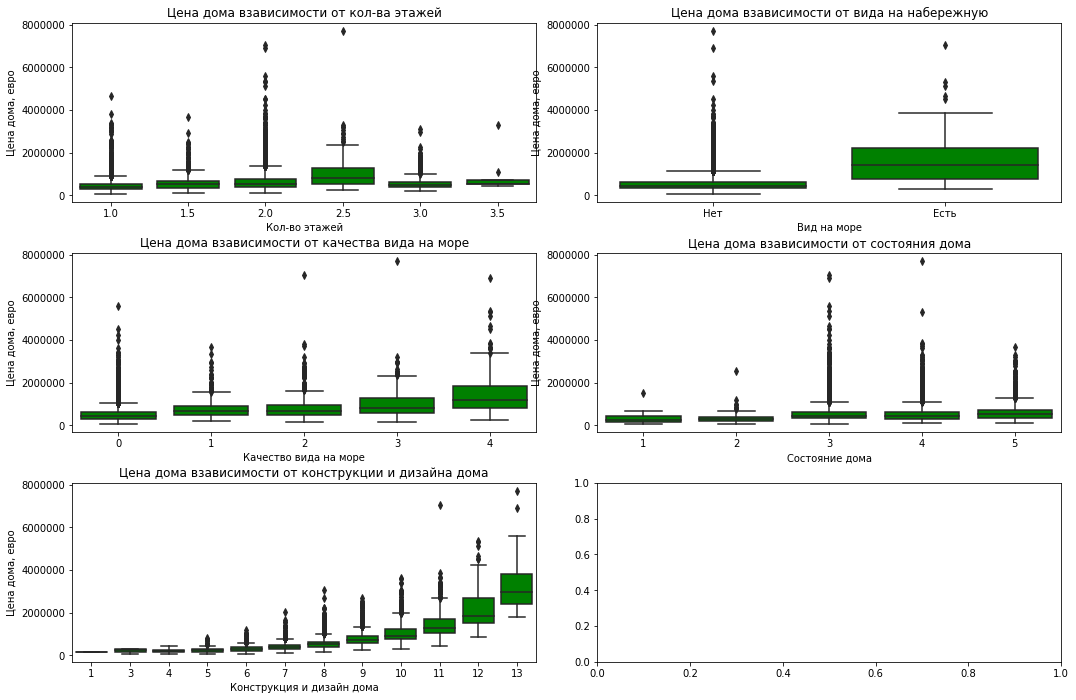

In [23]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
fig.tight_layout(pad = 3.0)

sns.boxplot(x = df_nominal_features['floors'], y = df_nominal_features['price'], data=df_nominal_features, color='g', saturation=10, ax=axs[0, 0])
sns.boxplot(x = df_nominal_features['waterfront'], y = df_nominal_features['price'], data=df_nominal_features, color='g', saturation=10, ax=axs[0, 1])
sns.boxplot(x = df_nominal_features['view'], y = df_nominal_features['price'], data=df_nominal_features, color='g', saturation=10, ax=axs[1, 0])
sns.boxplot(x = df_nominal_features['condition'], y = df_nominal_features['price'], data=df_nominal_features, color='g', saturation=10, ax=axs[1, 1])
sns.boxplot(x = df_nominal_features['grade'], y = df_nominal_features['price'], data=df_nominal_features, color='g', saturation=10, ax=axs[2, 0])



axs[0, 0].set_xlabel('Кол-во этажей')
axs[0, 0].set_ylabel('Цена дома, евро')
axs[0, 0].set_title("Цена дома взависимости от кол-ва этажей")
axs[0, 0].yaxis.set_major_formatter(FormatStrFormatter('%d'))

axs[0, 1].set_xlabel('Вид на море')
axs[0, 1].set_ylabel('Цена дома, евро')
axs[0, 1].set_title("Цена дома взависимости от вида на набережную")
axs[0, 1].set_xticklabels(['Нет', 'Есть'])
axs[0, 1].yaxis.set_major_formatter(FormatStrFormatter('%d'))

axs[1, 0].set_xlabel('Качество вида на море')
axs[1, 0].set_ylabel('Цена дома, евро')
axs[1, 0].set_title("Цена дома взависимости от качества вида на море")
axs[1, 0].yaxis.set_major_formatter(FormatStrFormatter('%d'))

axs[1, 1].set_xlabel('Состояние дома')
axs[1, 1].set_ylabel('Цена дома, евро')
axs[1, 1].set_title("Цена дома взависимости от состояния дома")
axs[1, 1].yaxis.set_major_formatter(FormatStrFormatter('%d'))

axs[2, 0].set_xlabel('Конструкция и дизайн дома')
axs[2, 0].set_ylabel('Цена дома, евро')
axs[2, 0].set_title("Цена дома взависимости от конструкции и дизайна дома")
axs[2, 0].yaxis.set_major_formatter(FormatStrFormatter('%d'))

#### Выводы:
1. Существует прямая линейная связь средней силы между количеством ванных и ценой дома.
2. Существует прямая линейная связь большой силы между жилой площадью (и площадью над землей) и ценой дома.
3. От других количественных признаков цена дома, видимо, не зависит или не сильно зависит.
4. Двухэтажные дома значимо отличаются высокими ценами от домов другой этажности.
5. Вид на море и его качество значимо влияет на цену дома, увеличивая её.
6. Только плохое состояние дома (ранга 1 и 2) значимо снижает цену дома, но дома в хорошем и отличном состоянии не отличаются по цене.
7. Цена дома, видимо, экспоненциально зависит от конструкции и дизайна дома.
